# Data Preparation

In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Membaca data dari file csv
data = pd.read_csv("Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Mencari informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# Statistik deskriptif dari dataset
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
# Menemukan missing value
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(['#'], axis=1)
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
# Menemukan baris-baris yang duplikat dalam data
print(f"Number of duplicated data is {data.duplicated().sum()}")

Number of duplicated data is 0


In [9]:
# Menemukan jika ada penulisan yang dalam dalam kolom "Name"
for value in data['Name']:
  if re.search(r'[^\w\s]', value):
    print(value)

Nidoran♀
Nidoran♂
Farfetch'd
Mr. Mime
Ho-oh
Mime Jr.
Porygon-Z
Zygarde50% Forme


In [10]:
# Merubah value dalam kolom "Name"
data['Name'] = data['Name'].replace({
    'Nidoran♀':'Nidoran Female',
    'Nidoran♂':'Nidoran Male'
})
# Merubah value dalam kolom "Legendary"
data['Legendary'] = data['Legendary'].replace({
    True: 'Legendary',
    False: 'Non Legendary'
})
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Non Legendary
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Non Legendary
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Non Legendary
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Non Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,Non Legendary


In [11]:
# Memisahkan teks yang tergabung
def separate_words(text):
    text = re.sub(r'(?<=[a-zA-Z])(?=[A-Z])', ' ', text)
    return text

data['Name'] = data['Name'].apply(separate_words)
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Non Legendary
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Non Legendary
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Non Legendary
3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Non Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,Non Legendary


In [12]:
# Mengurutkan data berdasarkan kolom "Name"
data = data.sort_values(by='Name')
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,Abomasnow,Grass,Ice,494,90,92,75,92,85,60,4,Non Legendary
511,Abomasnow Mega Abomasnow,Grass,Ice,594,90,132,105,132,105,30,4,Non Legendary
68,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,Non Legendary
392,Absol,Dark,NaN,465,65,130,60,75,60,75,3,Non Legendary
393,Absol Mega Absol,Dark,NaN,565,65,150,60,115,60,115,3,Non Legendary


# Exploratory Data Analysis

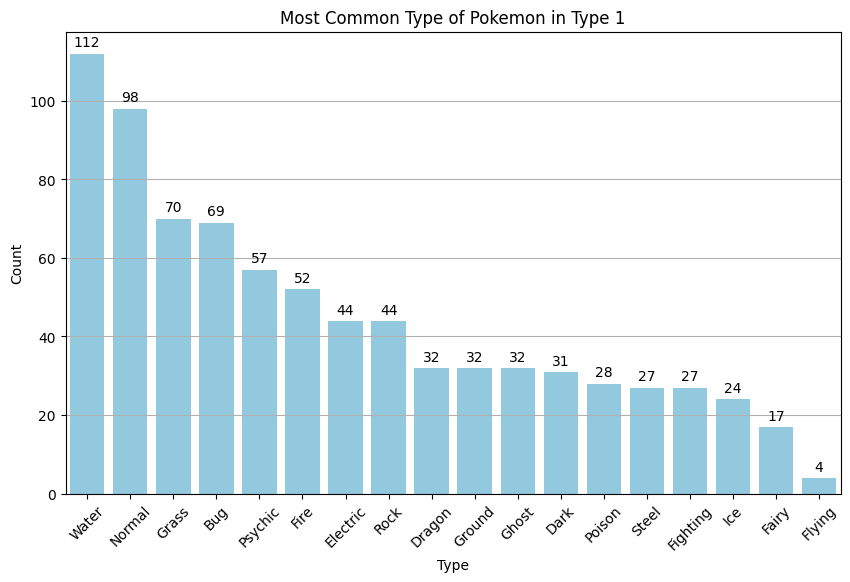

In [13]:
# Menghitung jumlah pokemon pada tipe 1
type1 = data['Type 1'].value_counts()

# Visualisasi data
plt.figure(figsize=(10, 6))
sns.barplot(x=type1.index, y=type1.values, color='skyblue')
plt.title('Most Common Type of Pokemon in Type 1')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan keterangan angka di setiap bar
for i in range(len(type1)):
    plt.text(i, type1.values[i] + 1, str(type1.values[i]), ha='center', va='bottom')

plt.show()

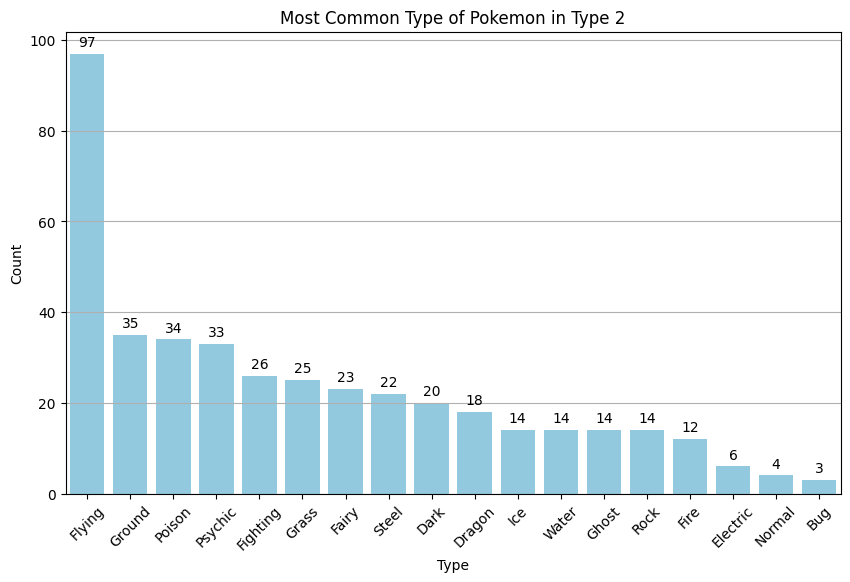

In [14]:
# Menghitung jumlah pokemon pada tipe 2
type2 = data['Type 2'].value_counts()

# Visualisasi data
plt.figure(figsize=(10, 6))
sns.barplot(x=type2.index, y=type2.values, color='skyblue')
plt.title('Most Common Type of Pokemon in Type 2')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan keterangan angka di setiap bar
for i in range(len(type2)):
    plt.text(i, type2.values[i] + 1, str(type2.values[i]), ha='center', va='bottom')

plt.show()

Type 2
True     414
False    386
Name: count, dtype: int64


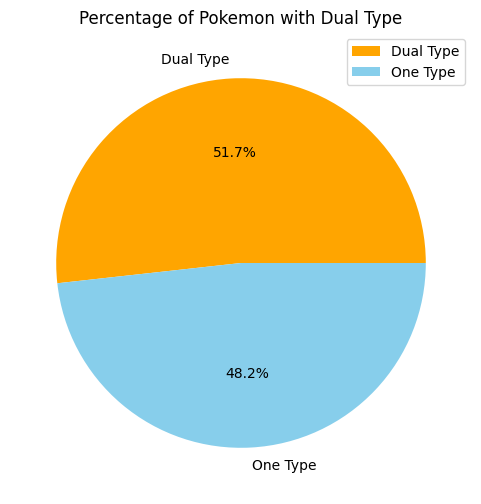

In [15]:
# Menghitung jumlah Pokémon yang memiliki dua tipe
Dual_Type = data['Type 2'].notnull().value_counts()
print(Dual_Type)

# Visualisasi Data
labels = ['Dual Type', 'One Type']
plt.figure(figsize=(6, 6))
plt.pie(Dual_Type, labels=labels, autopct='%1.1f%%', colors=['orange', 'skyblue'])
plt.title('Percentage of Pokemon with Dual Type')
plt.legend(labels=labels, loc='upper right')
plt.show()

In [16]:
# Pokemon dengan status yang paling tinggi (Total)
Highest_Status = data.sort_values(by='Total', ascending=False)
Highest_Status.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,Mewtwo Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,Legendary
163,Mewtwo Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,Legendary
426,Rayquaza Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,Legendary
422,Kyogre Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,Legendary
424,Groudon Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,Legendary


In [17]:
# Pokemon dengan status rendah (Total)
Lowest_Status = data.sort_values(by='Total', ascending=True)
Lowest_Status.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,Non Legendary
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,Non Legendary
446,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,Non Legendary
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,Non Legendary
16,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,Non Legendary


In [18]:
# Pokemon yang memiliki HP paling tinggi
Highest_HP = data.sort_values(by='HP', ascending=False)
Highest_HP.iloc[0]

Name                Blissey
Type 1               Normal
Type 2                  NaN
Total                   540
HP                      255
Attack                   10
Defense                  10
Sp. Atk                  75
Sp. Def                 135
Speed                    55
Generation                2
Legendary     Non Legendary
Name: 261, dtype: object

In [19]:
# Pokemon yang memiliki HP paling rendah
Lowest_HP = data.sort_values(by='HP', ascending=True)
Lowest_HP.iloc[0]

Name               Shedinja
Type 1                  Bug
Type 2                Ghost
Total                   236
HP                        1
Attack                   90
Defense                  45
Sp. Atk                  30
Sp. Def                  30
Speed                    40
Generation                3
Legendary     Non Legendary
Name: 316, dtype: object

In [20]:
# Pokemon yang memiliki attack paling tinggi
Strongest_Attack = data.sort_values(by='Attack', ascending=False)
Strongest_Attack.iloc[0]

Name          Mewtwo Mega Mewtwo X
Type 1                     Psychic
Type 2                    Fighting
Total                          780
HP                             106
Attack                         190
Defense                        100
Sp. Atk                        154
Sp. Def                        100
Speed                          130
Generation                       1
Legendary                Legendary
Name: 163, dtype: object

In [21]:
# Pokemon yang memiliki defense paling tinggi
Strongest_Defense = data.sort_values(by='Defense', ascending=False)
Strongest_Defense.iloc[0]

Name          Aggron Mega Aggron
Type 1                     Steel
Type 2                       NaN
Total                        630
HP                            70
Attack                       140
Defense                      230
Sp. Atk                       60
Sp. Def                       80
Speed                         50
Generation                     3
Legendary          Non Legendary
Name: 333, dtype: object

In [22]:
# Pokemon yang memiliki special attack paling tinggi
Highest_Sp_Atk = data.sort_values(by='Sp. Atk', ascending=False)
Highest_Sp_Atk.iloc[0]

Name          Mewtwo Mega Mewtwo Y
Type 1                     Psychic
Type 2                         NaN
Total                          780
HP                             106
Attack                         150
Defense                         70
Sp. Atk                        194
Sp. Def                        120
Speed                          140
Generation                       1
Legendary                Legendary
Name: 164, dtype: object

In [23]:
# Pokemon yang memiliki special defense paling tinggi
Highest_Sp_Def = data.sort_values(by='Sp. Def', ascending=False)
Highest_Sp_Def.iloc[0]

Name                Shuckle
Type 1                  Bug
Type 2                 Rock
Total                   505
HP                       20
Attack                   10
Defense                 230
Sp. Atk                  10
Sp. Def                 230
Speed                     5
Generation                2
Legendary     Non Legendary
Name: 230, dtype: object

In [40]:
# Pokemon yang memiliki speed paling tinggi
Highest_Speed = data.sort_values(by='Speed', ascending=False)
Highest_Speed.iloc[0]

Name          Deoxys Speed Forme
Type 1                   Psychic
Type 2                       NaN
Total                        600
HP                            50
Attack                        95
Defense                       90
Sp. Atk                       95
Sp. Def                       90
Speed                        180
Generation                     3
Legendary              Legendary
Name: 431, dtype: object

In [25]:
# Pokemon yang memiliki speed paling rendah
Lowest_Speed = data.sort_values(by='Speed', ascending=True)
Lowest_Speed.iloc[0]

Name               Munchlax
Type 1               Normal
Type 2                  NaN
Total                   390
HP                      135
Attack                   85
Defense                  40
Sp. Atk                  40
Sp. Def                  85
Speed                     5
Generation                4
Legendary     Non Legendary
Name: 495, dtype: object

In [45]:
# Pokemon dengan speed tertinggi di setiap generasi
fastest_Pokemons_each_generation = data.loc[data.groupby('Generation')['Speed'].idxmax()]
fastest_Pokemons_each_generation[['Generation', 'Name', 'Speed']]

,Generation,Name,Speed
154,1,Aerodactyl Mega Aerodactyl,150
183,2,Crobat,130
431,3,Deoxys Speed Forme,180
476,4,Lopunny Mega Lopunny,135
678,5,Accelgor,145
731,6,Talonflame,126


<ipython-input-50-f95c6c5d21a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=fastest_Pokemons_each_generation['Generation'].values, y=fastest_Pokemons_each_generation['Speed'].values, palette='Blues_d')


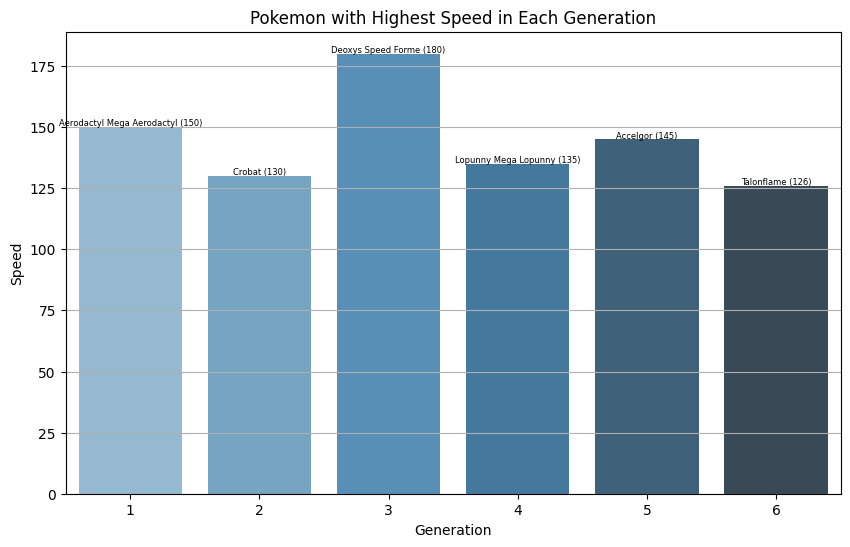

In [50]:
# Visualisasi data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=fastest_Pokemons_each_generation['Generation'].values, y=fastest_Pokemons_each_generation['Speed'].values, palette='Blues_d')
plt.title('Pokemon with Highest Speed in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Speed')
plt.grid(axis='y')

# Menambahkan label nama di atas setiap bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    name = fastest_Pokemons_each_generation['Name'].iloc[i]
    speed = fastest_Pokemons_each_generation['Speed'].iloc[i]
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f"{name} ({speed})", ha="center", fontsize=6)

plt.show()

In [28]:
# Pokemon berdasarkan generasi
Generation = data.groupby('Generation').size()
Generation

Generation
1    166
2    106
3    160
4    121
5    165
6     82
dtype: int64

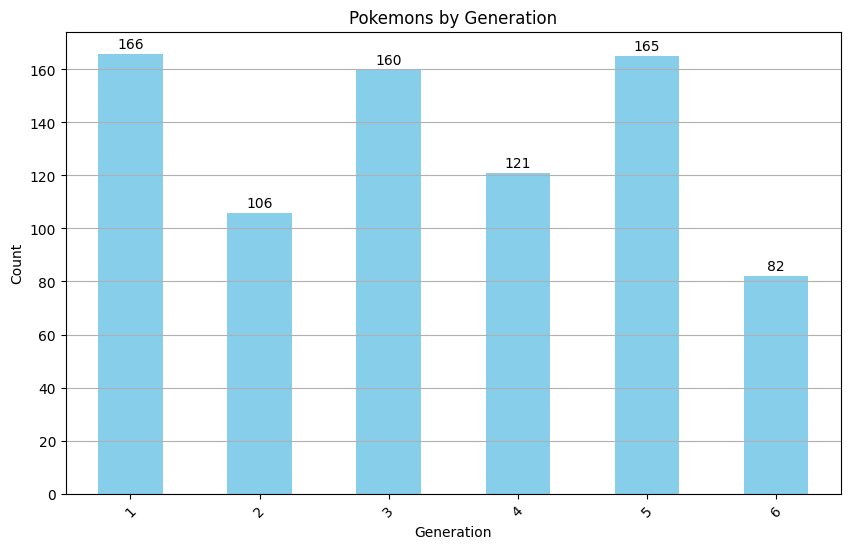

In [29]:
# Visualisasi data
bars = Generation.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Pokemons by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan keterangan angka di setiap bar
for i in range(len(Generation)):
    plt.text(i, Generation.values[i] + 1, str(Generation.values[i]), ha='center', va='bottom')

plt.show()

In [30]:
# Pokemon berdasarkan legendari
Legendary = data.groupby('Legendary').size()
Legendary

Legendary
Legendary         65
Non Legendary    735
dtype: int64

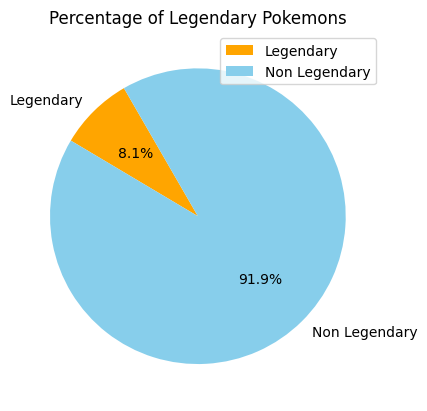

In [31]:
# Visualisasi daya
plt.pie(Legendary, labels=Legendary.index, autopct='%1.1f%%', startangle=120, colors=['orange','skyblue'])
plt.title('Percentage of Legendary Pokemons')
plt.legend(labels=Legendary.index, loc='upper right')
plt.show()

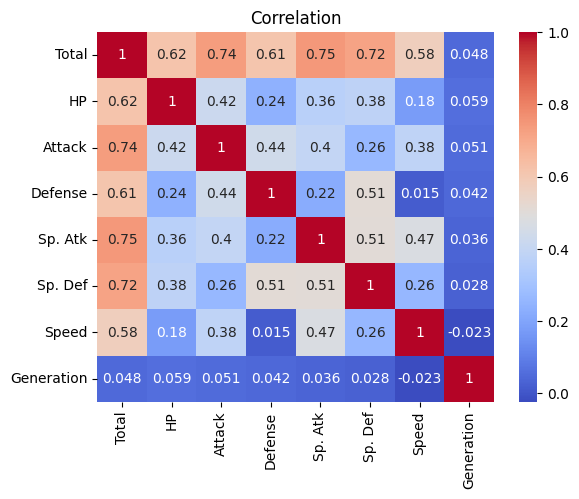

In [32]:
# Korelasi
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()